In [1]:
import os
import time
import pandas as pd
import numpy as np
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve, accuracy_score, classification_report
from datetime import datetime

#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Source
#### Reading file from folder locations


In [2]:
df = pd.read_csv('HR_data.csv')
print("Shape of Data: ",df.shape)
print('The missing columns in the dataset are: ',df.columns[df.isnull().any()].values) 
df.head()

Shape of Data:  (1470, 35)
The missing columns in the dataset are:  []


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
#View some basic statistical details like percentile, mean, standard deviation etc.
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## EDA

### Number of employee oberall left or stayed in company

83.87755155563354
16.122448444366455


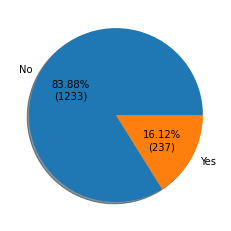

In [4]:

def per_val(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

v_counts = df['Attrition'].value_counts()
total = len(df['Attrition'])
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=per_val, shadow=True);

### Number of employees that left and stayed by age

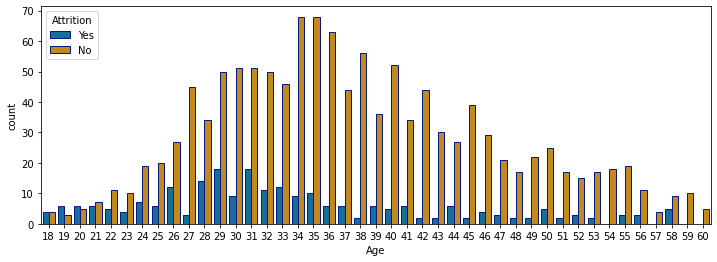

In [5]:

import matplotlib.pyplot as plt
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x='Age', hue='Attrition', data = df, palette="colorblind", ax = ax,  
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.show()

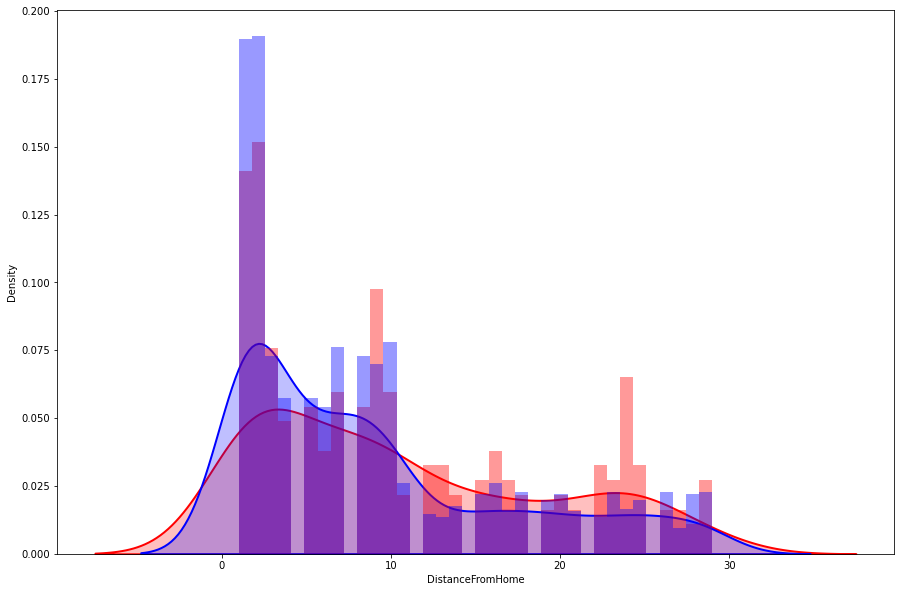

In [6]:
yes_attrition_df = (df[df['Attrition']=='Yes']).copy()
no_attrition_df = (df[df['Attrition']=='No']).copy()
plt.figure(figsize=(15,10))
sns.distplot(yes_attrition_df['DistanceFromHome'], hist=True, kde=True, 
             bins=int(180/5), color = 'red', 
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Left the Organization")

sns.distplot(no_attrition_df['DistanceFromHome'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',  
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Stayed back organization")

plt.show()

In [7]:

# attrition_df = (df[df['Attrition']=='Yes']).copy()
# def bar_plt(df):
#     plt.figure(figsize=(len(df.columns),len(df.columns)+10), facecolor='white')
#     cat_col = (df.select_dtypes(include = "object")).columns
#     plotnum=1
#     for i in cat_col:
#         ax=plt.subplot(len(cat_col),3,plotnum)
#         sns.barplot(df[i].value_counts().values, df[i].value_counts().index)
#         plt.title(i)
#         plotnum+=1
#     plt.show(block=False)


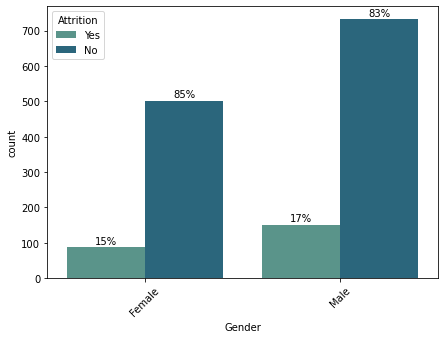

In [8]:
def plt_bar(i):
    plt.figure(figsize=(7,5))
    ax=sns.countplot(x=df[i], hue="Attrition", data=df,palette='crest')
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]
    for left, right in zip(left_bars, right_bars):
            height_l = left.get_height()
            height_r = right.get_height()
            total = height_l + height_r
            ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha="center")
            ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha="center")
    plt.xticks(rotation=45)
    plt.show()
plt_bar('Gender')


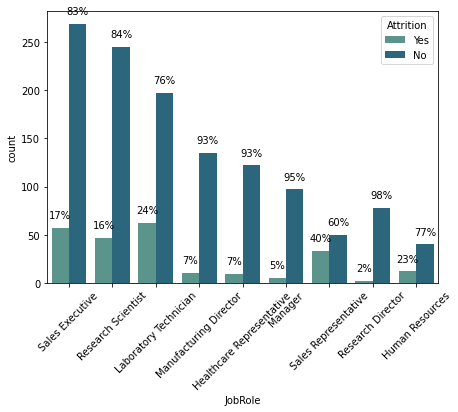

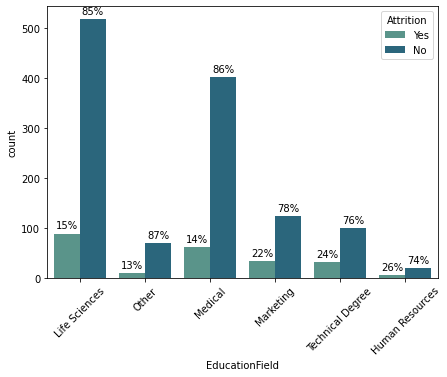

In [9]:
plt_bar('JobRole')
plt_bar('EducationField')

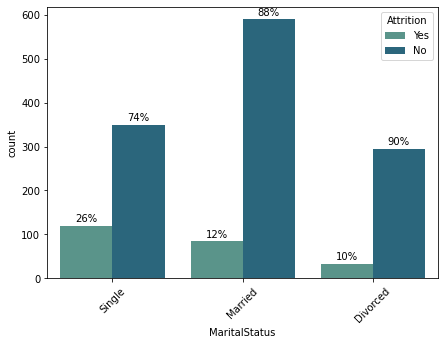

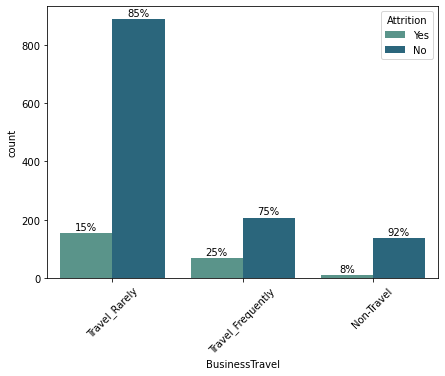

In [10]:
plt_bar('MaritalStatus')
plt_bar('BusinessTravel')

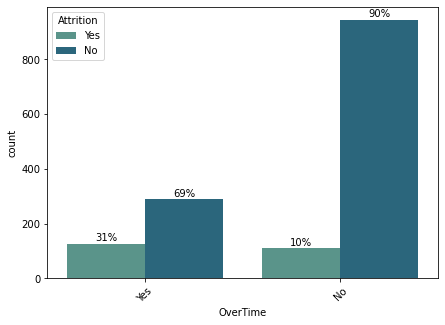

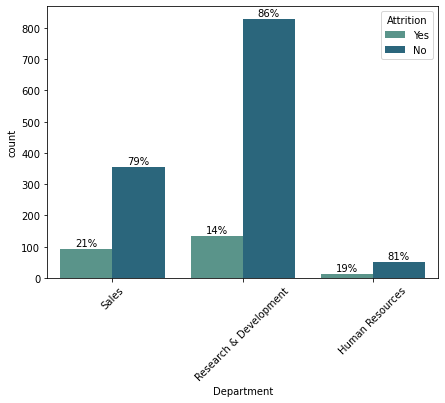

In [11]:
plt_bar('OverTime')
plt_bar('Department')

### Features and their unique values

In [12]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("_________________________________________________________________")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_________________________________________________________________
Gender 

In [13]:
#droping some of the unwanted columns
df=df.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18'], axis=1)

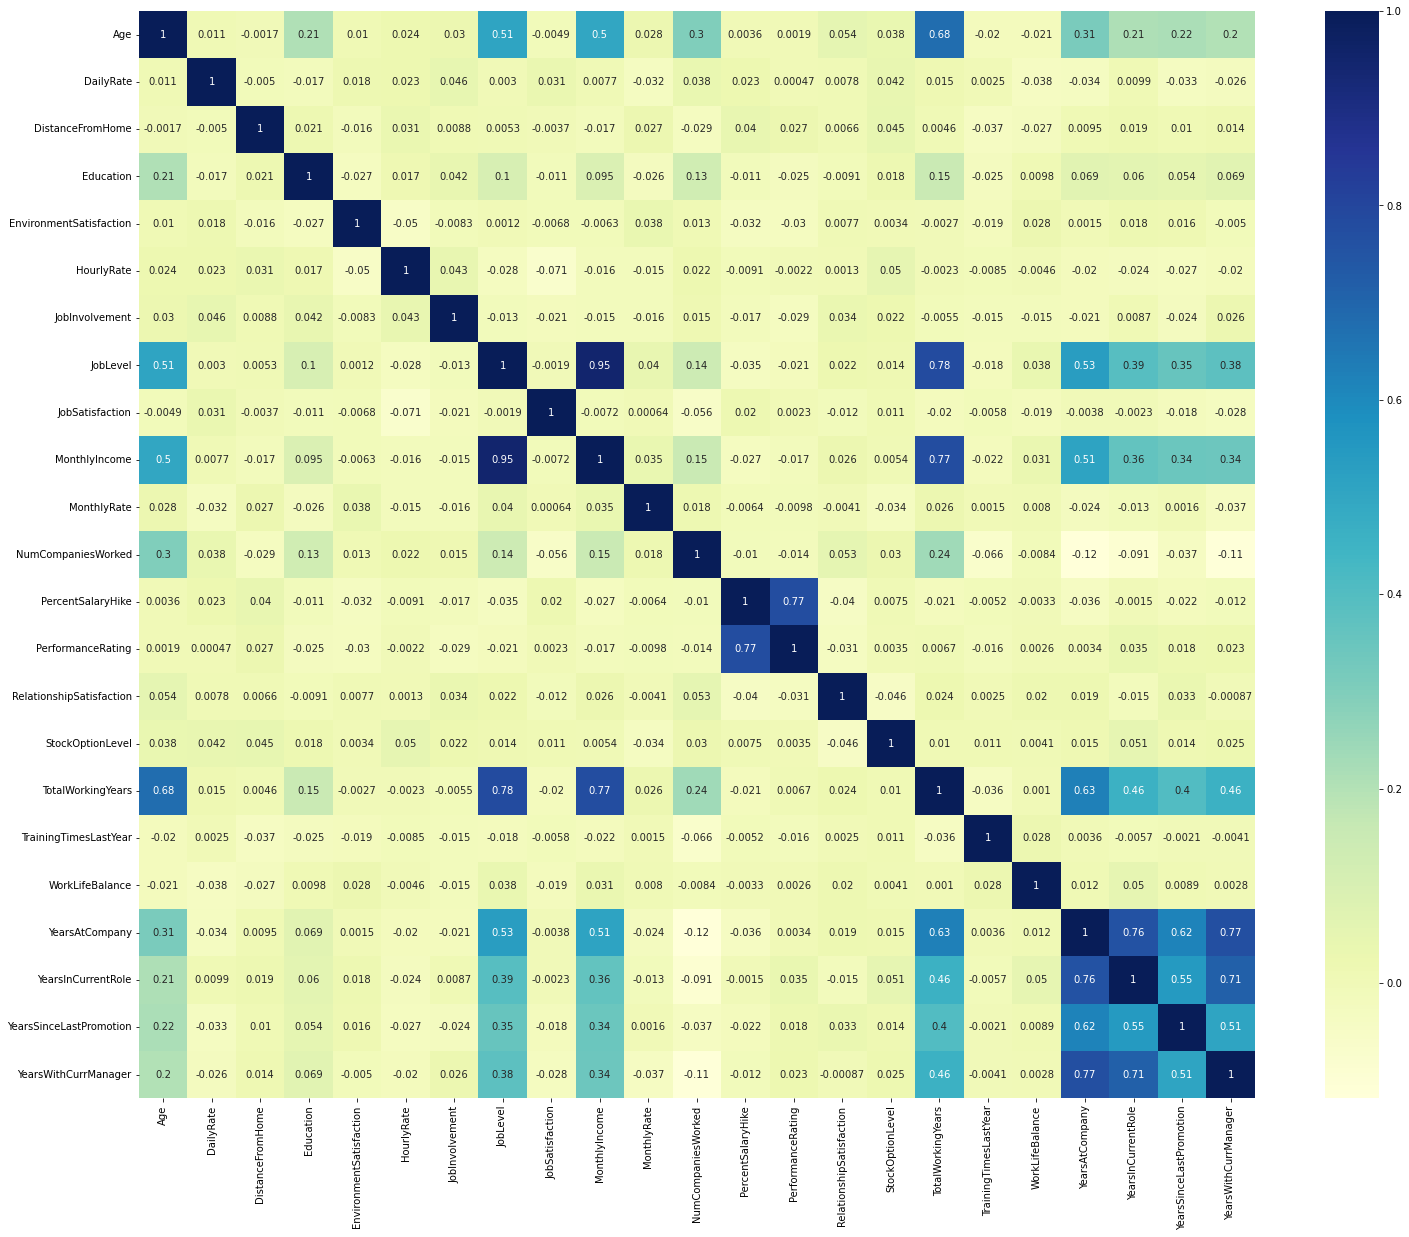

In [14]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

#### Number of Attrition : Out of 1470 nos. of employee 237 Employees left the Job and are the reason of attrition employees

Cleary dat we have got is unbalanced to make prediction, hence we have to consider it at the time of model prediction and creating Model Training and Model Testing

### Feature Engineering

The numeric and categorical fields need to be treated separately and the target field needs to be separated from the training dataset. The following few steps separate the numeric and categorical fields and drops the target field 'Attrition' from the feature set.

In [15]:
#Extracting the Numeric and Categorical features
df_num = pd.DataFrame(data = df.select_dtypes(include = ['int64']))
df_cat = pd.DataFrame(data = df.select_dtypes(include = ['object']))
print("Shape of Numeric: ",df_num.shape)
print("Shape of Categorical: ",df_cat.shape)

Shape of Numeric:  (1470, 23)
Shape of Categorical:  (1470, 8)


###  Encoding Categorical Fields

The categorical fields have been encoded using the get_dummies() function of Pandas.


In [16]:
#Dropping 'Attrition' from df_cat before encoding
df_cat = df_cat.drop(['Attrition'], axis=1) 

#Encoding using Pandas' get_dummies
df_cat_encoded = pd.get_dummies(df_cat)
df_cat_encoded.head(5)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


### Scaling Numeric Fields

The numeric fields have been scaled next for best results. StandardScaler() has been used for the same. Post scaling of the numeric features, they are merged with the categorical ones.


In [17]:
#Using StandardScaler to scale the numeric features
standard_scaler = StandardScaler()
df_num_scaled = standard_scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(data = df_num_scaled, columns = df_num.columns, index = df_num.index)
print("Shape of Numeric After Scaling: ",df_num_scaled.shape)
print("Shape of categorical after Encoding: ",df_cat_encoded.shape)

Shape of Numeric After Scaling:  (1470, 23)
Shape of categorical after Encoding:  (1470, 28)


In [18]:
#Combining the Categorical and Numeric features
df_transformed_final = pd.concat([df_num_scaled,df_cat_encoded], axis = 1)
print("Shape of final dataframe: ",df_transformed_final.shape)

Shape of final dataframe:  (1470, 51)


In [19]:
#Extracting the target variable - 'Attrition'
target = df['Attrition']

#Mapping 'Yes' to 1 and 'No' to 0
map = {'Yes':1, 'No':0}
target = target.apply(lambda x: map[x])

print("Shape of target: ",target.shape)

#Copying into commonly used fields for simplicity
X = df_transformed_final #Features
Y = target #Target

Shape of target:  (1470,)


#### Spliting data for Model Training and Testing

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y,random_state=50)
print("Shape of Train Dataset: ",x_train.shape)
print("Shape of Test Dataset: ",x_test.shape)


Shape of Train Dataset:  (1176, 51)
Shape of Test Dataset:  (294, 51)


******Count of attrition and no_attrition employee in Train Dataset:******

83.84353518486023
16.15646332502365


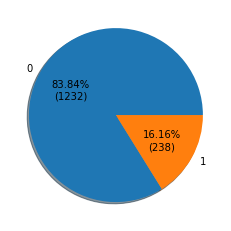

In [21]:
print('******Count of attrition and no_attrition employee in Train Dataset:******\n')
def per_val(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

v_counts = y_train.value_counts()
total = len(df['Attrition'])
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=per_val, shadow=True);

******Count of attrition and no_attrition employee in Test Dataset:******

84.01360511779785
15.986394882202148


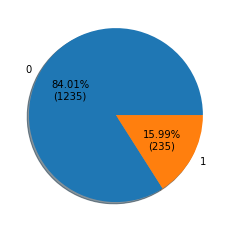

In [22]:
print("******Count of attrition and no_attrition employee in Test Dataset:******\n")
def per_val(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

v_counts = y_test.value_counts()
total = len(df['Attrition'])
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=per_val, shadow=True);

#### Creating few Functions for further Evaluation 

In [23]:
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
        import matplotlib.pyplot as plt
        import numpy as np
        import itertools
        accuracy = np.trace(cm) / np.sum(cm).astype('float')
        misclass = 1 - accuracy
        if cmap is None:
            cmap = plt.get_cmap('Blues')
        plt.figure(figsize=(8, 6))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()

        if target_names is not None:
            tick_marks = np.arange(len(target_names))
            plt.xticks(tick_marks, target_names, rotation=45)
            plt.yticks(tick_marks, target_names)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        thresh = cm.max() / 1.5 if normalize else cm.max() / 2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")


        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
        plt.show()
        
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    print('_________________________Model Performance_________________________\n\n')
#     print('Accuracy = {:0.2f}%.'.format(accuracy * 100))
    print(classification_report(test_labels, predictions))
    return accuracy


### Base Model

RF Train Model Score :85.54%.


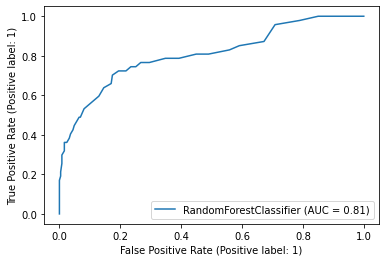

Time elapsed 0.390625


In [24]:
start = time.process_time()
rf = RandomForestClassifier(random_state=42, oob_score=True)
model=rf.fit(x_train, y_train)
print("RF Train Model Score :{:0.2f}%.".format( 100 * model.oob_score_))

y_pred = model.predict(x_test)
plot_roc_curve(rf, x_test, y_test)
plt.show()

print('Time elapsed {}'.format(time.process_time() - start))

### Model Evaluation

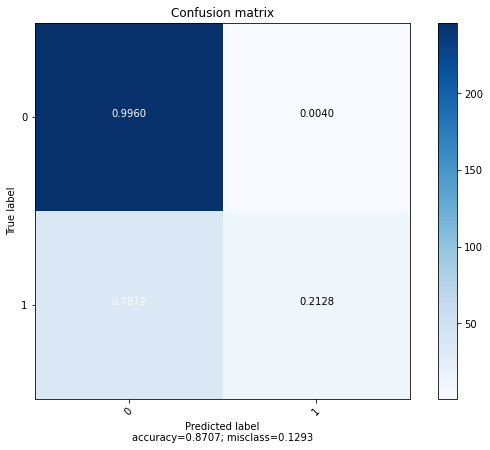

In [25]:
labels = ['Attrition_Yes', 'Attrition_No']
cm=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,[0,1])

In [26]:
base_accuracy= evaluate(model, x_test, y_test)
print("\n\nBase Model Accuracy: {:0.2f}%." .format(base_accuracy * 100))

_________________________Model Performance_________________________


              precision    recall  f1-score   support

           0       0.87      1.00      0.93       247
           1       0.91      0.21      0.34        47

    accuracy                           0.87       294
   macro avg       0.89      0.60      0.64       294
weighted avg       0.88      0.87      0.84       294



Base Model Accuracy: 87.07%.


### Hyper-parameter tuning for the Random Forest¶

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
start = time.process_time()
rf = GradientBoostingClassifier(max_features = 0.7, learning_rate = 0.3)

params = {
    'max_depth': [3,5,6,8,10,12],
    'min_samples_leaf': [2,5,10,20],
    'n_estimators': [2,5,10,15,25]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv =2,
                           verbose=1, scoring="accuracy")

grid_model=grid_search.fit(x_train, y_train)
rf_best = grid_search.best_estimator_

print("\nBest Model: ",rf_best)

print("\nGridSerchCV Model Score: {:0.2f}%." .format(grid_search.best_score_*100))

grid_accuracy = evaluate(rf_best,  x_test, y_test)

print('Time elapsed {}'.format(time.process_time() - start))

Fitting 2 folds for each of 120 candidates, totalling 240 fits

Best Model:  GradientBoostingClassifier(learning_rate=0.3, max_features=0.7,
                           min_samples_leaf=20, n_estimators=25)

GridSerchCV Model Score: 86.99%.
_________________________Model Performance_________________________


              precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1       0.79      0.32      0.45        47

    accuracy                           0.88       294
   macro avg       0.84      0.65      0.69       294
weighted avg       0.87      0.88      0.85       294

Time elapsed 9.078125


In [28]:
final_model=rf_best.fit(x_train, y_train)

Improvement of 0.68%.


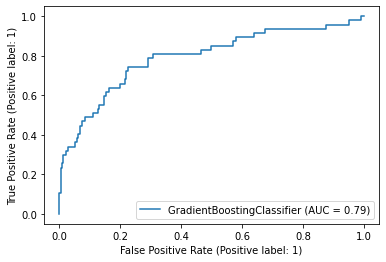

In [34]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) ))
plot_roc_curve(final_model, x_test, y_test)
plt.show()

In [30]:
# Return the feature importances (the higher, the more important the feature).
importances = pd.DataFrame({"Varname": x_train.columns,"Imp": rf_best.feature_importances_}) 
importances = importances.sort_values('Imp',ascending=False)
importances
print("\n\n**-------------------Top 5 Important Features------------------**\n",importances.head(6))



**-------------------Top 5 Important Features------------------**
             Varname       Imp
49      OverTime_No  0.117898
9     MonthlyIncome  0.096322
0               Age  0.070629
8   JobSatisfaction  0.059006
6    JobInvolvement  0.050182
1         DailyRate  0.048107


In [31]:
# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
trace = go.Scatter(
    y = rf_best.feature_importances_,
    x = x_train.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf_best.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = x_train.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')


In [32]:

y_pred = final_model.predict(x_test)
print("Train Model Score:{:0.2f}%.".format( 100 * model.score(x_train, y_train)))
print("Test Model Score:{:0.2f}%.".format( 100 * model.score(x_test, y_test)))
print("\nTrain Model Score after Hyper Parameter Tunning: {:0.2f}%.".format( 100 * final_model.score(x_train, y_train)))
print("Test Model Score after Hyper Parameter Tunning:{:0.2f}%.".format( 100 * final_model.score(x_test, y_test)))
predication_output = pd.DataFrame({'Id': x_test.index ,'Target': y_pred })

Train Model Score:100.00%.
Test Model Score:87.07%.

Train Model Score after Hyper Parameter Tunning: 93.54%.
Test Model Score after Hyper Parameter Tunning:87.07%.


In [33]:
predication_output.to_csv(os.path.join("Prediction_"+datetime.now().strftime('%Y-%m-%d')))